In [66]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Building dataset to work on

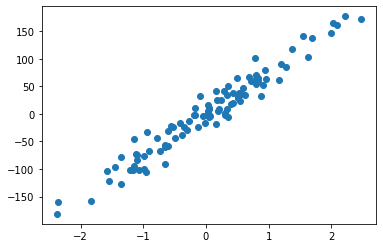

In [67]:
X,y=datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

plt.plot(X,y,'o')

## Implementing Linear Regression class with fit() and predict() methods

In [77]:
class LinearRegression:
    
    def __init__(self, lr = 0.001, n_inter = 1000):
        self.lr=lr
        self.n_inter=n_inter
        self.weights=None
        self.bias=None
        
    def fit(self, x , y):
        n_sample,n_feature=x.shape
        self.weights=np.zeros(n_feature)
        self.bias=0
        for _ in range(self.n_inter):
            y_predicted=np.dot(x,self.weights)+self.bias
            dw= (2/n_sample)*np.dot(x.T,(y_predicted-y))
            db=(2/n_sample)*np.sum(y_predicted-y)
            
            self.weights-=self.lr*dw
            self.bias=self.lr*db
            
    def predict(self,x):
        y_predicted=np.dot(x,self.weights)+self.bias
        return y_predicted

In [78]:
def mse(y_true,y_pred):
    return(np.mean(y_true-y_pred))

In [83]:
regressor=LinearRegression(lr=0.01)

regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)

mse_error=mse(y_test,y_pred)

In [84]:
mse_error

-1.6159250386382418

In [85]:
y_prediction=regressor.predict(X)

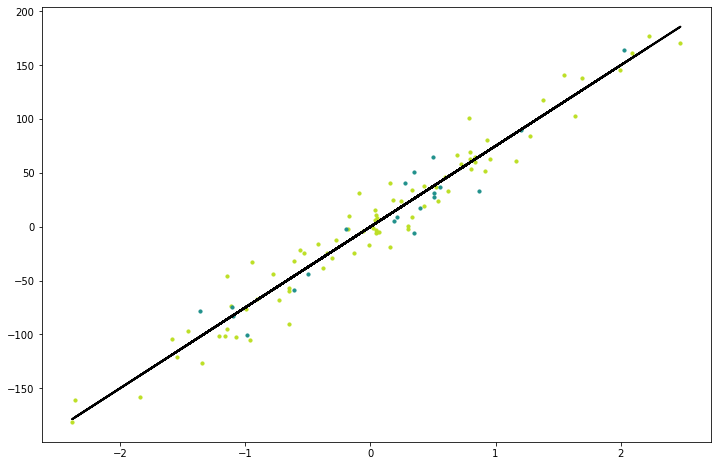

In [91]:
plt.figure(figsize=(12,8))
m1=plt.scatter(x_train,y_train,color=cmap(0.9),s=10)
m2=plt.scatter(x_test,y_test,color=cmap(0.5),s=10)
plt.plot(X,y_prediction,color='black',linewidth=2,label='predictions')
plt.show()